<div class = "alert alert-block alert-info">
    <b> Przetwarzanie obrazów. Filtracja obrazów </b>
   
FTiMS, semestr zimowy 2022/2023

Laboratorium 4
</div>

### Zapoznaj się z ...

Zapoznaj się z treścią niniejszego notebooka. Wykonaj kod i przeanalizuj wyniki. Możesz eksperymentować z kodem, parametrami, itd. 

Koniecznie zapoznaj się też z zagadnieniem płytkich i głębokich kopii w pythonie, np. https://betterprogramming.pub/shallow-copy-vs-deep-copy-in-python-357e5f502bf9. Brak panowania nad tym zagadnieniem generuje trudne do wykrycia błędy.


### Uwaga

1. Do zadania dołączony jest plik ``butterfly.jpg``. Nie jest on konieczny, ale wszystkie przykłady dotyczą tego konkretnego obrazu. Plik z obrazem umieść w katalogu, z którego uruchamiasz ten notebook lub podaj ścieżkę dostępu do pliku.

1. **Zadanie do rozwiązania jest umieszczone na końcu notebooka.**

# Operacje na obrazach. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#### Podstawy. Wczytanie, wyświetlanie, analiza macierzy obrazu

Wczytanie i wyświetlenie przykładowego obrazu. 

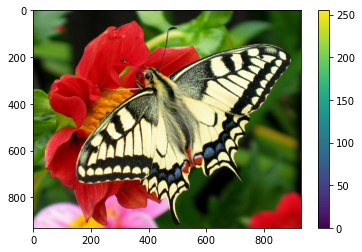

In [3]:
img = plt.imread('butterfly.jpg')
plt.imshow(img,aspect = 'auto')
plt.colorbar()

Rzut oka na strukturę obiektu ``img`` (macierz)

In [4]:
img.shape

(931, 931, 3)

Pierwszy piksel obrazu (*lewy-górny róg*) to wektor trójwymiarowy (RGB). Oczywiście pozostałe również.

In [5]:
img[0,0,:]

array([ 78, 124,  59], dtype=uint8)

Pozornie to banalne, ale co oznacza, np. $RGB = (78,123,59)$? Odpowiedzią na to pytanie niech będzie obraz wypełniony jednorodnie pikselami o takich wartościach:

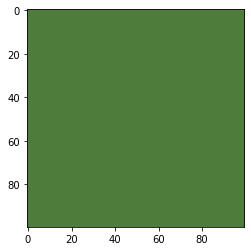

In [10]:
fooimg = np.ones((100,100,3), dtype = np.uint8) # przykładowy obraz 100x100 pikseli
fooimg[:,:,0] = 78
fooimg[:,:,1] = 124
fooimg[:,:,2] = 59
plt.imshow(fooimg)

#### Podstawowe operacje

Wycinamy pewien element obrazu (podobraz).

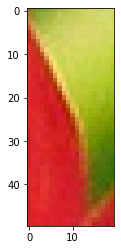

In [6]:
img2 = img[140:190,390:410,:]
plt.imshow(img2)

In [7]:
img2.shape

(50, 20, 3)

A teraz wykonujemy proste modyfikacje obrazu (operacje punktowe): 

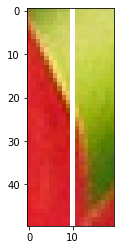

In [8]:
img2[:, 10, :] = 255 # wszystkie składowe RGB = 255 w wybranej kolumnie obrazu, a więc piksele "białe"
plt.imshow(img2)

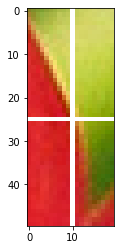

In [9]:
img2[25, :, :] = 255 # podobnie jak wyżej, ale tym razem wiersz, a nie kolumna
plt.imshow(img2)

Kolejne 3 transformacje. Tym razem selektywnie ustawiamy wartości składowych RGB:

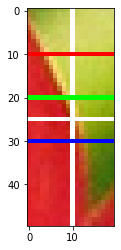

In [10]:
img2[10,:,:] = [255, 0, 0]
img2[20,:,:] = [0, 255, 0]
img2[30,:,:] = [0, 0, 255]
plt.imshow(img2)

#### Analiza wartości pikseli w obrazie

Popatrzmy na wykres wartości pikseli w wybranym wierszu obrazu. Zwróć uwagę, że nieprzypadkowo w 10 kolumnie tego obrazu wartości pikseli są równe maksymalnej wartości 255 - przed chwilą na taką wartość zostały one ustawione.

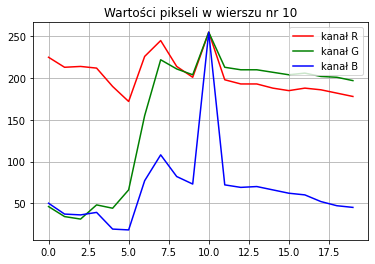

In [11]:
plt.plot(img2[15, :, 0], c = 'red', label = 'kanał R')
plt.plot(img2[15, :, 1], c = 'green', label = 'kanał G')
plt.plot(img2[15, :, 2], c = 'blue', label = 'kanał B')
plt.grid()
plt.title('Wartości pikseli w wierszu nr 10')
plt.legend( loc = 'upper right')

Z czystej ciekawości, jaka jest wartość średnia składowej R w obrazie? Odpowiedź poniżej (dwa równoważne sposoby):

In [12]:
img2[:, :, 0].mean()

188.077

In [13]:
np.mean(img2[:, :, 0])

188.077

A wartości min i max w obrazie?

In [14]:
print(img2.max()); print(img2.min())

255
0


#### Obraz w składowych RGB. Separacja składowych

Wykonujemy ćwiczenie dekompozycji obrazu RGB na trzy niezależne składowe barwne R, G oraz B.

Text(0.5, 1.0, 'Kanał B')

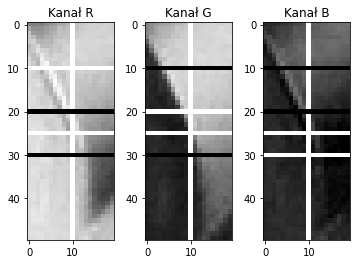

In [15]:
plt.subplot(1,3,1)
plt.imshow(img2[:,:,0], cmap = 'gray') #zmień cmap na cmap = 'viridis' (na przykład)
plt.title('Kanał R')

plt.subplot(1,3,2)
plt.imshow(img2[:, :, 1], cmap = 'gray')
plt.title('Kanał G')

plt.subplot(1,3,3)
plt.imshow(img2[:, :, 2], cmap = 'gray')
plt.title('Kanał B')

Wykonajmy jeszcze jedno ćwiczenie: transpozycję macierzy obrazu składowej R (macierzowo to transpozycja, a wizualnie jeden z obrotów obrazu). Dla ułatwienia analizy wyniku operacji dodamy pewien "wizualny punkt orientacyjny" w obrazie.

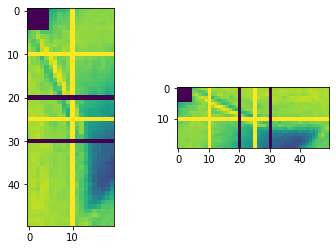

In [16]:
img2R = img2[:, :, 0]
img2R[0:5, 0:5] = 0  # dodajemy pewien "punkt orientacyjny"
plt.subplot(1,2,1)
plt.imshow(img2R)
plt.subplot(1,2,2)
plt.imshow(img2R.T)

#### Uproszczona *kompresja* obrazu

Wykonajmy transformację obrazu polegającą na zastąpieniu każdej $i$-tej ($i = 1,3,5,...$) kolumny macierzy obrazu kolumną $i-1$. Taki przykład, na poziomie teoretycznym, był analizowany podczas wykładu.

Podstawowy obraz jest zbyt duży, by zauważyć efekt takiej operacji, w związku z tym operację wykonamy na podobrazie obrazu oryginalnego.

Text(0.5, 1.0, 'Podobraz')

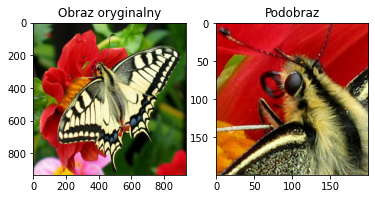

In [17]:
img = plt.imread('butterfly.jpg')

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Obraz oryginalny')

img = img[200:400, 300:500,:] #definiujemy podobraz
plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Podobraz')

In [18]:
img2 = img.copy() #Uwaga: głęboka kopia!!!! 
for i in range(1,200,2):
    img2[:, i, :] = img2[:, i-1, :]

Zobaczmy jaki jest efekt takiej zmiany poprzez porównanie podobrazu oryginalnego oraz zmodyfikowanego? Czy różnica jest dostrzegalna *gołym okiem*? Raczej nie, pomimo tego, że ingerencja w obraz jest *raczej duża*.

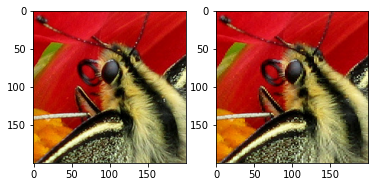

In [19]:
plt.subplot(1,2,1) 
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img2)

W celu dostrzeżenia różnicy porównajmy oba obrazy na mniejszych fragmentach, gdzie ludzkie oko ma szansę wyłapać zmianę...

Text(0.5, 1.0, 'Podobraz zmodyfikowany')

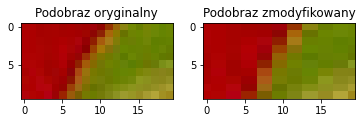

In [20]:
plt.subplot(1,2,1) 
plt.imshow(img[50:60,5:25,:])
plt.title('Podobraz oryginalny')

plt.subplot(1,2,2)
plt.imshow(img2[50:60,5:25,:])
plt.title('Podobraz zmodyfikowany')

oraz bezpośrednio na poziomie macierzy

In [21]:
img[0,0:6,:]

array([[202,   5,  12],
       [201,   7,   8],
       [203,   7,   9],
       [208,   7,  15],
       [199,   9,  11],
       [200,   3,  10]], dtype=uint8)

In [22]:
img2[0,0:6,:]

array([[202,   5,  12],
       [202,   5,  12],
       [203,   7,   9],
       [203,   7,   9],
       [199,   9,  11],
       [199,   9,  11]], dtype=uint8)

Tak, na tym poziomie różnice są dostrzegalne.

# Zadania

#### Zadanie 1

(**0.5 punktu**) Zmodyfikuj obraz cyfrowy w następujący sposób:
- pozostaw  oryginalne wartości pikseli RGB tylko w tych przypadkach gdzie wartość R (red) danego piksela  przekracza $0.7$ wartości maksymalnej tej składowej w całym obrazie, 
- składowe R, G, B wszystkich pozostałych pikseli obrazu zastąp wartoscią srednią RGB, tzn. R = G = B = (R+G+B)/3

Uwagi:
- składowe R, G, B obrazu są zmiennymi typu uint8. Wartość średnia RGB w ogólności nie. Problem możesz rozwiązać m. in. przez wykonanie działania całkowitoliczbowo, tzn. przez operator // (dwa slashe)

*tu umieść swoje rozwiązanie*

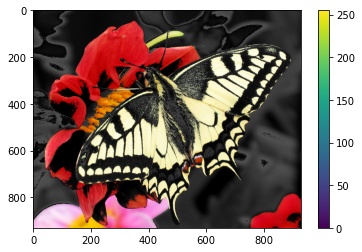

In [94]:
import copy
img = plt.imread('butterfly.jpg')
plt.imshow(img,aspect = 'auto')
img2=copy.deepcopy(img)

r2=img[:,:,0] <= 0.7*img[:, :, 0].max()
r=img[:,:,0]
r[r2]=0
g=img[:,:,1]
b=img[:,:,1]
img2[:,:,0]=(r+g+b)//3
img2[:,:,1]=(r+g+b)//3
img2[:,:,2]=(r+g+b)//3
img[r2,:] = img2[r2,:]
plt.imshow(img,aspect = 'auto')
plt.colorbar()

#### Zadanie 2

(**0.5 punktu**) Zmodyfikuj obraz cyfrowy tak, by dodać do niego tzw. szum biały, tzn. każdemu pikselowi obrazu z określonym (wybranym przez siebie prawdopodobieństwem) nadaj losową wartość (niezależnie w składowych R, G oraz B). 

*tu umieść swoje rozwiązanie*

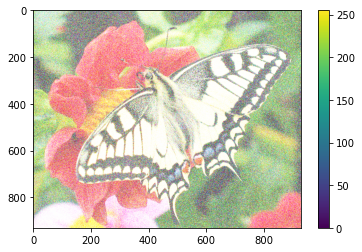

In [91]:

img = plt.imread('butterfly.jpg')
w=img.shape
macierz=[]
macierz=np.random.randint(256, size=w)
img3=img+macierz 
img3=np.clip(img3,0,255)
plt.imshow(img3,aspect = 'auto')
plt.colorbar()